# Restricted Boltzmann Machine 

In [2]:
import tensorflow as tf
import numpy as np

from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
v_bias = tf.Variable(tf.zeros([7]), tf.float32)
h_bias = tf.Variable(tf.zeros([2]), tf.float32)

In [4]:
W = tf.constant(np.random.normal(loc=0.0, scale=1.0, size=(7, 2)).astype(np.float32))

### Phase 1) Forward Propagation

In [5]:
# Assuming that we have a trained RBM, and a very simple input vector such as [1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0]
# Let's see what the output of forward pass would look like.
X = tf.constant([[1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0]])

v_state = X
print("Input: ", v_state)

h_bias = tf.constant([0.1, 0.1])
print(f"hb: {h_bias}")
print(f"w: {W}")

# Calculate the probabilities of turning the hidden units on:
h_prob = tf.nn.sigmoid(tf.matmul(v_state, W) + h_bias) # probabilities of the hidden units
print("p(h|v): ",h_prob)

# Draw samples from the distribution:
h_state = tf.nn.relu(tf.sign(h_prob - tf.random.uniform(tf.shape(h_prob)))) # states
print(f"h0 states: {h_state}")




Input:  tf.Tensor([[1. 0. 0. 1. 0. 0. 0.]], shape=(1, 7), dtype=float32)
hb: [0.1 0.1]
w: [[ 0.9957702   0.41040307]
 [ 1.1125721   0.11600418]
 [-0.99647915  0.1477951 ]
 [ 0.7819729   1.9111606 ]
 [-0.95201576  1.5220022 ]
 [ 0.7343104   0.50511885]
 [-0.4386052   1.7663141 ]]
p(h|v):  tf.Tensor([[0.8673517 0.9184569]], shape=(1, 2), dtype=float32)
h0 states: [[1. 1.]]


### Phase 2) Backward Pass (Reconstruction)

In [6]:
vb = tf.constant([0.1, 0.2, 0.1, 0.1, 0.1, 0.2, 0.1])
print(f"b: {vb}")

v_prob = tf.nn.sigmoid(tf.matmul(h_state, tf.transpose(W)) + vb)
print(f"p(vi|h): {v_prob}")

v_state = tf.nn.relu(tf.sign(v_prob - tf.random.uniform(tf.shape(v_prob))))
print("v probability states: ", v_state)

b: [0.1 0.2 0.1 0.1 0.1 0.2 0.1]
p(vi|h): [[0.81849337 0.80667937 0.3211081  0.94230366 0.66150016 0.80836624
  0.80654407]]
v probability states:  tf.Tensor([[0. 1. 0. 1. 1. 1. 1.]], shape=(1, 7), dtype=float32)


In [7]:
inp = X
print(f"input X:", v_prob[0].numpy())

print("probability vector:", v_prob[0].numpy())
v_probability = 1

for elm, p in zip(inp[0], v_prob[0]):
  if elm==1:
    v_probability *= p
  else:
    v_probability *= (1-p)

print("probability of generating X: ", v_probability.numpy())

input X: [0.81849337 0.80667937 0.3211081  0.94230366 0.66150016 0.80836624
 0.80654407]
probability vector: [0.81849337 0.80667937 0.3211081  0.94230366 0.66150016 0.80836624
 0.80654407]
probability of generating X:  0.0012702742


## MNIST
We will be using the MNIST dataset to practice the usage of RBMs.

In [8]:
# loading training data
mnist = tf.keras.datasets.mnist
(trX, trY), (teX, teY) = mnist.load_data()

# showing an example of the flatten class and operation
from tensorflow.keras.layers import Flatten
flatten = Flatten(dtype='float32')
trX = flatten(trX/255.0)
trY = flatten(trY/255.0)

11490434/11490434 [==============================] - 0s 0us/step


MNIST images have 784 pixels, so the visible layer must have 784 input nodes. For our case, we'll use 50 nodes in the hidden layer, so i = 50.

In [9]:
trX.shape

TensorShape([60000, 784])

In [10]:
trY.shape

TensorShape([60000, 1])

In [11]:
vb = tf.Variable(tf.zeros([784]), tf.float32)
hb = tf.Variable(tf.zeros([50]), tf.float32)

Let **W** be the Tensor of 784x50 (784 - number of visible neurons, 50 - number of hidden neurons) that represents weights between the neurons.

In [12]:
W = tf.Variable(tf.zeros([784, 50]), tf.float32)

In [14]:
v0_state = tf.Variable(tf.zeros([784]), tf.float32)

#testing to see if the matrix product works
tf.matmul( [v0_state], W)

<tf.Tensor: shape=(1, 50), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.]], dtype=float32)>

Define hidden layer

In [15]:
#computing the hidden nodes probability vector and checking shape
h0_prob = tf.nn.sigmoid(tf.matmul([v0_state], W) + hb)  #probabilities of the hidden units
print("h0_state shape: " , tf.shape(h0_prob))

#defining a function to return only the generated hidden states 
def hidden_layer(v0_state, W, hb):
    h0_prob = tf.nn.sigmoid(tf.matmul([v0_state], W) + hb)  #probabilities of the hidden units
    h0_state = tf.nn.relu(tf.sign(h0_prob - tf.random.uniform(tf.shape(h0_prob)))) #sample_h_given_X
    return h0_state


h0_state = hidden_layer(v0_state, W, hb)
print("first 15 hidden states: ", h0_state[0][0:15])

h0_state shape:  tf.Tensor([ 1 50], shape=(2,), dtype=int32)
first 15 hidden states:  tf.Tensor([0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 1.], shape=(15,), dtype=float32)


Define reconstruction part

In [16]:
def reconstructed_output(h0_state, W, vb):
  v1_prob = tf.nn.sigmoid(tf.matmul(h0_state, tf.transpose(W)) + vb)
  v1_state = tf.nn.relu(tf.sign(v1_prob - tf.random.uniform(tf.shape(v1_prob)))) # sample v given h
  return v1_state[0]

v1_state = reconstructed_output(h0_state, W, vb)
print("hidden state shape: ", h0_state.shape)
print("v0 state shape: ",v0_state.shape)
print("v1 state shape: ", v1_state.shape)

hidden state shape:  (1, 50)
v0 state shape:  (784,)
v1 state shape:  (784,)


<h3>What is the objective function?</h3>

<b>Goal</b>: Maximize the likelihood of our data being drawn from that distribution

<b>Calculate error:</b>  
In each epoch, we compute the "error" as a sum of the squared difference between step 1 and step n,
e.g the error shows the difference between the data and its reconstruction.

<b>Note:</b> tf.reduce_mean computes the mean of elements across dimensions of a tensor.


In [17]:
def error(v0_state, v1_state):
  return tf.reduce_mean(tf.square(v0_state - v1_state))

err = tf.reduce_mean(tf.square(v0_state - v1_state))
print("error", err.numpy())

error 0.502551


In [18]:
h1_prob = tf.nn.sigmoid(tf.matmul([v1_state], W) + hb)
h1_state = tf.nn.relu(tf.sign(h1_prob - tf.random.uniform(tf.shape(h1_prob)))) # sample h given x


In [19]:
print(f"error: {error(v0_state, v1_state)}")

error: 0.5025510191917419


In [22]:
#Parameters
alpha = 0.01
epochs = 1
batchsize = 200
weights = []
errors = []
batch_number = 0
K = 1

#creating datasets
train_ds = \
    tf.data.Dataset.from_tensor_slices((trX, trY)).batch(batchsize)

for epoch in range(epochs):
    for batch_x, batch_y in train_ds:
        batch_number += 1
        for i_sample in range(batchsize):           
            for k in range(K):
                v0_state = batch_x[i_sample]
                h0_state = hidden_layer(v0_state, W, hb)
                v1_state = reconstructed_output(h0_state, W, vb)
                h1_state = hidden_layer(v1_state, W, hb)

                delta_W = tf.matmul(tf.transpose([v0_state]), h0_state) - tf.matmul(tf.transpose([v1_state]), h1_state)
                W = W + alpha * delta_W

                vb = vb + alpha * tf.reduce_mean(v0_state - v1_state, 0)
                hb = hb + alpha * tf.reduce_mean(h0_state - h1_state, 0) 

                v0_state = v1_state

            if i_sample == batchsize-1:
                err = error(batch_x[i_sample], v1_state)
                errors.append(err)
                weights.append(W)
                print ( 'Epoch: %d' % epoch, 
                       "batch #: %i " % batch_number, "of %i" % int(60e3/batchsize), 
                       "sample #: %i" % i_sample,
                       'reconstruction error: %f' % err)



Epoch: 0 batch #: 1  of 300 sample #: 199 reconstruction error: 0.152949
Epoch: 0 batch #: 2  of 300 sample #: 199 reconstruction error: 0.249192
Epoch: 0 batch #: 3  of 300 sample #: 199 reconstruction error: 0.100141
Epoch: 0 batch #: 4  of 300 sample #: 199 reconstruction error: 0.100136
Epoch: 0 batch #: 5  of 300 sample #: 199 reconstruction error: 0.118915
Epoch: 0 batch #: 6  of 300 sample #: 199 reconstruction error: 0.211954
Epoch: 0 batch #: 7  of 300 sample #: 199 reconstruction error: 0.097477
Epoch: 0 batch #: 8  of 300 sample #: 199 reconstruction error: 0.129553
Epoch: 0 batch #: 9  of 300 sample #: 199 reconstruction error: 0.098482
Epoch: 0 batch #: 10  of 300 sample #: 199 reconstruction error: 0.161040
Epoch: 0 batch #: 11  of 300 sample #: 199 reconstruction error: 0.105501
Epoch: 0 batch #: 12  of 300 sample #: 199 reconstruction error: 0.146339
Epoch: 0 batch #: 13  of 300 sample #: 199 reconstruction error: 0.070866
Epoch: 0 batch #: 14  of 300 sample #: 199 reco

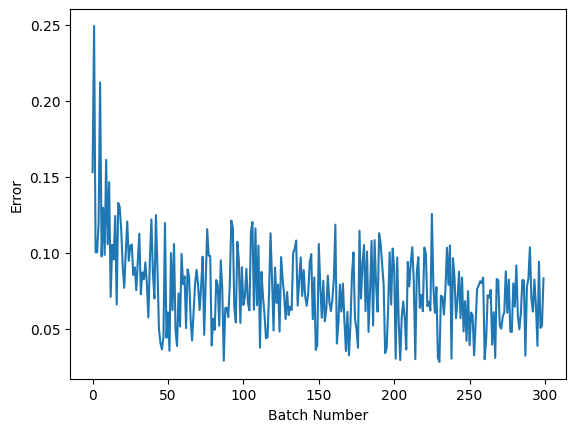

In [23]:
plt.plot(errors)
plt.xlabel("Batch Number")
plt.ylabel("Error")
plt.show()

In [24]:
print(W.numpy()) # a weight matrix of shape (50, 784) final

[[-0.42999986 -0.33999994 -0.19000001 ... -0.29       -0.45999983
  -0.20000002]
 [-0.36999992 -0.33999994 -0.22000003 ... -0.32999995 -0.46999982
  -0.21000002]
 [-0.34999993 -0.33999994 -0.20000002 ... -0.29       -0.44999984
  -0.24000004]
 ...
 [-0.40999988 -0.30999997 -0.18       ... -0.26000002 -0.3899999
  -0.16      ]
 [-0.46999982 -0.29       -0.17       ... -0.29       -0.4899998
  -0.14999999]
 [-0.3899999  -0.30999997 -0.17       ... -0.28       -0.5199998
  -0.21000002]]


--2023-06-08 08:30:49--  https://ibm.box.com/shared/static/vvm1b63uvuxq88vbw9znpwu5ol380mco.jpg
Resolving ibm.box.com (ibm.box.com)... 74.112.186.144
Connecting to ibm.box.com (ibm.box.com)|74.112.186.144|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /public/static/vvm1b63uvuxq88vbw9znpwu5ol380mco.jpg [following]
--2023-06-08 08:30:49--  https://ibm.box.com/public/static/vvm1b63uvuxq88vbw9znpwu5ol380mco.jpg
Reusing existing connection to ibm.box.com:443.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://ibm.ent.box.com/public/static/vvm1b63uvuxq88vbw9znpwu5ol380mco.jpg [following]
--2023-06-08 08:30:49--  https://ibm.ent.box.com/public/static/vvm1b63uvuxq88vbw9znpwu5ol380mco.jpg
Resolving ibm.ent.box.com (ibm.ent.box.com)... 74.112.186.144
Connecting to ibm.ent.box.com (ibm.ent.box.com)|74.112.186.144|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://public.boxcloud.com/d/1/b

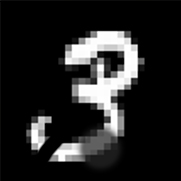

In [25]:
!wget -O destructed3.jpg  https://ibm.box.com/shared/static/vvm1b63uvuxq88vbw9znpwu5ol380mco.jpg
img = Image.open('destructed3.jpg')
img

In [27]:
# convert the image to a 1d numpy array
sample_case = np.array(img.convert('I').resize((28,28))).ravel().reshape((1, -1))/255.0

sample_case = tf.cast(sample_case, dtype=tf.float32)

In [28]:
hh0_p = tf.nn.sigmoid(tf.matmul(sample_case, W) + hb)
hh0_s = tf.round(hh0_p)

print("Probability nodes in hidden layer:" ,hh0_p)
print("activated nodes in hidden layer:" ,hh0_s)

# reconstruct
vv1_p = tf.nn.sigmoid(tf.matmul(hh0_s, tf.transpose(W)) + vb)

print(vv1_p)
#rec_prob = sess.run(vv1_p, feed_dict={ hh0_s: hh0_s_val, W: prv_w, vb: prv_vb})

Probability nodes in hidden layer: tf.Tensor(
[[1.00000000e+00 6.47064388e-01 2.47405318e-10 1.00000000e+00
  9.99881685e-01 3.85045499e-01 1.91215631e-02 5.37376764e-06
  9.99999404e-01 9.99801755e-01 1.16938178e-11 9.99998868e-01
  9.99621987e-01 1.00000000e+00 4.62528795e-01 8.08811074e-11
  3.09194775e-07 9.99998212e-01 1.00000000e+00 4.86413967e-08
  1.19772056e-04 4.74345285e-10 3.51110905e-01 8.75887362e-14
  1.00000000e+00 1.69188413e-11 4.06732084e-04 1.44996748e-05
  9.89528596e-01 4.69734405e-05 7.63662408e-14 6.20519955e-08
  1.87580351e-09 9.11722905e-17 7.17827827e-02 1.23689272e-08
  9.81641352e-01 6.50004210e-08 2.13091295e-10 8.42963398e-01
  9.11637432e-10 1.16801396e-01 5.30982716e-03 8.28949887e-09
  9.99267578e-01 6.29620314e-11 9.91371095e-01 2.01447145e-03
  6.79790735e-01 2.92761024e-11]], shape=(1, 50), dtype=float32)
activated nodes in hidden layer: tf.Tensor(
[[1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0.
  1. 0. 0. 0. 1. 0. 0. 0. 0